In [1]:
### conexiones
import sys
sys.path.insert(0, "/home/jupyter")

%time
import ciphered_connections as connections
import getpass
from datetime import datetime

path = getpass.getpass("PATH: ")
key = getpass.getpass("KEY:  ")
iv = getpass.getpass("IV:   ")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


PATH:  ················································
KEY:   ································
IV:    ················


In [2]:
# path: /home/jupyter/ciphered_connections/000543781.dta  
# key: 50bb801fa81378a538654b2b7076b223
# iv: 9029080389AF47F5

%time

conexion_bq = connections.BigQueryConnection(
    path_token = path, key = key, 
    iv = iv)
datetime_str = datetime.now().strftime("%Y%m%d%H%M%S")
table = "DATAMART.gcs_tabla_tiger_{0}".format(datetime_str)
bucket_object = "gcs_file_tiger_{0}_*.csv".format(datetime_str)
bucket_name = 'nbamasmovil'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


In [3]:
# Descarga de tablón
query_decil = '''
    SELECT *                                  
    FROM  `bi-data-science-pilots.DESARROLLO.TABLON_1P_SEG_Comp_TRES_202006`
    where Decil < 3
        '''
TABLON_decil = conexion_bq.download_table_bq_gcs(query_decil,
    tabla_tmp = table, bucket_name = bucket_name,
    tmp_object = bucket_object)

TABLON_decil


Query results loaded to table /projects/bi-data-science-pilots/datasets/DATAMART/tables/gcs_tabla_tiger_20201123092619
Exported DATAMART.gcs_tabla_tiger_20201123092619 to gs://nbamasmovil/gcs_file_tiger_20201123092619_*.csv
Ejecutando la query:
 drop table `bi-data-science-pilots.DATAMART.gcs_tabla_tiger_20201123092619` ...

Query ejecutada correctamente


,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Propension,VERSION,fuga_real,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO
0,2020,6,202006,YOIGO,28884,2006-12-26,2010-09-13,9,0,0,...,0.862904,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,6,202006,YOIGO,2301964,2010-09-09,2019-04-17,10,0,0,...,0.681388,2,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,2020,6,202006,YOIGO,4126345,2012-05-09,2019-09-26,4,0,0,...,0.555489,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,6,202006,YOIGO,2886763,2011-04-04,2019-03-28,6,0,0,...,0.602524,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,6,202006,YOIGO,1350792,2009-09-08,2016-02-24,13,0,0,...,0.660534,2,0,NaN,NaN,0.0,0.0,1.0,20.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63608,2020,6,202006,YOIGO,2642600,2011-01-19,NaN,1,1,1,...,0.567925,2,0,NaN,-953.894588,0.0,0.0,1.0,17.95,0.0
63609,2020,6,202006,YOIGO,6747604,2015-05-18,NaN,1,1,1,...,0.533885,2,0,NaN,-869.680823,0.0,0.0,2.0,37.95,0.0
63610,2020,6,202006,YOIGO,5583052,2013-10-22,2015-05-01,2,1,1,...,0.504622,2,0,NaN,-930.454572,0.0,0.0,1.0,17.95,0.0
63611,2020,6,202006,YOIGO,5630829,2013-11-13,2017-10-25,2,1,1,...,0.678044,2,0,NaN,-966.104820,0.0,0.0,1.0,17.95,0.0


In [4]:
df=TABLON_decil.copy()
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Propension,VERSION,fuga_real,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO
0,2020,6,202006,YOIGO,28884,2006-12-26,2010-09-13,9,0,0,...,0.862904,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,6,202006,YOIGO,2301964,2010-09-09,2019-04-17,10,0,0,...,0.681388,2,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,2020,6,202006,YOIGO,4126345,2012-05-09,2019-09-26,4,0,0,...,0.555489,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,6,202006,YOIGO,2886763,2011-04-04,2019-03-28,6,0,0,...,0.602524,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,6,202006,YOIGO,1350792,2009-09-08,2016-02-24,13,0,0,...,0.660534,2,0,NaN,NaN,0.0,0.0,1.0,20.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63608,2020,6,202006,YOIGO,2642600,2011-01-19,NaN,1,1,1,...,0.567925,2,0,NaN,-953.894588,0.0,0.0,1.0,17.95,0.0
63609,2020,6,202006,YOIGO,6747604,2015-05-18,NaN,1,1,1,...,0.533885,2,0,NaN,-869.680823,0.0,0.0,2.0,37.95,0.0
63610,2020,6,202006,YOIGO,5583052,2013-10-22,2015-05-01,2,1,1,...,0.504622,2,0,NaN,-930.454572,0.0,0.0,1.0,17.95,0.0
63611,2020,6,202006,YOIGO,5630829,2013-11-13,2017-10-25,2,1,1,...,0.678044,2,0,NaN,-966.104820,0.0,0.0,1.0,17.95,0.0


In [5]:
# tratamiento de valores ausentes 

# Imputación de valores perdidos sobre el tablon con todos los registros

df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
df.isnull().values.any()

False

In [6]:
import pandas as pd 
import numpy as np

In [7]:
def verificar(var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

verificar("is_churn")   
# AVG_THR_QOE_MOBI
# AVG_KPI_QOE_MOBI
 # MOBILE_INCIDENCES implica jira AZUL
 # Mobile_Red_Incidences

['FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_MAS',
 'FRIENDS_IS_CHURN_PEP',
 'FRIENDS_IS_CHURN_GMM']

In [8]:
# Generacion de  PROBLEMAS_TECNICOS
# ==============================================================
# condiciones
conditions = [#(df['NUM_LINE_KPI_QOE_MOBI'] > 1) |
              (df['NUM_LINE_THR_QOE_MOBI'] > 1) |
              (df['MOBILE_INCIDENCES'] > 1) |              
              (df['AVG_THR_QOE_MOBI']<=0.5) |  
              (df['AVG_DL_PEAK_THR_KBPS_MOBI']<=1381.39 ) |
              (df['AVG_KPI_PERC_CSS_MOBI']<=54.23) 
             ]

# valores
values = [1]
               
# aplicaciones
df['PROBLEMAS_TECNICOS'] = np.select(conditions, values)


# Generacion de  TICKETS_RED
# ==============================================================
# condiciones
conditions = [(df['TICKETS_NETWORK'] >= 2  )  | 
              (df['Mobile_Red_Incidences'] >=1)]

# valores
values = [1]
               
# aplicaciones
df['TICKETS_RED'] = np.select(conditions, values)
    
    
# Generacion de  low_signal
# ==============================================================
# condiciones
conditions = [(df['NUM_THR_QOE_MOBI_1'] == 1 ) | 
              (df['NUM_THR_QOE_MOBI_2'] == 1 ) | 
              (df['IS_DETERIORED_3M_AVG_KPI_QOE_MOBI']==1) |            
              (df['DELTA_MOBILE_INCIDENCES_3M_MONTH']==1) ]


# valores
values = [1]
               
# aplicaciones
df['low_signal'] = np.select(conditions, values)
    
    
#  'NUM_THR_QOE_MOBI_1',
#  'NUM_THR_QOE_MOBI_2',
#  'NUM_THR_QOE_MOBI_3',
#  'NUM_THR_QOE_MOBI_4',
#  'NUM_THR_QOE_MOBI_5',

In [9]:
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal
0,2020,6,202006,YOIGO,28884,2006-12-26,2010-09-13,9,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
1,2020,6,202006,YOIGO,2301964,2010-09-09,2019-04-17,10,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
2,2020,6,202006,YOIGO,4126345,2012-05-09,2019-09-26,4,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
3,2020,6,202006,YOIGO,2886763,2011-04-04,2019-03-28,6,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
4,2020,6,202006,YOIGO,1350792,2009-09-08,2016-02-24,13,0,0,...,0.0,0.000000,0.0,0.0,1.0,20.00,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63608,2020,6,202006,YOIGO,2642600,2011-01-19,.,1,1,1,...,0.0,-953.894588,0.0,0.0,1.0,17.95,0.0,0,0,0
63609,2020,6,202006,YOIGO,6747604,2015-05-18,.,1,1,1,...,0.0,-869.680823,0.0,0.0,2.0,37.95,0.0,1,0,1
63610,2020,6,202006,YOIGO,5583052,2013-10-22,2015-05-01,2,1,1,...,0.0,-930.454572,0.0,0.0,1.0,17.95,0.0,0,0,1
63611,2020,6,202006,YOIGO,5630829,2013-11-13,2017-10-25,2,1,1,...,0.0,-966.104820,0.0,0.0,1.0,17.95,0.0,0,0,1


#### Depuracion de tabla

In [10]:
import AYD
cadena=AYD.DS.DSC_Factor(df)
cadena_constantes = cadena[cadena.unique==1]           
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes

['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CONSENTSTATUSDETAIL',
 'CONSENTSTATUSNAME',
 'CONSENT_STATUS_DS',
 'CONSENT_STATUS_DETAIL',
 'CUST_PREP_SEGMENT',
 'MAIN_BRAND',
 'CRM_WORK_TYPE']

In [11]:
cadena=AYD.DS.DSC_Factor(df)
cadena.head()

,Variables,TIPO,count,nº_NA,Pcte_NA,unique,top,freq
0,BRAND_DS,Factor,191059,0,0,1,YOIGO,191059
1,MIN_SERV_ACTIVATION_DATE,Factor,191059,0,0,4555,2014-02-03,521
2,MAX_SERV_DEACTIVATION_DATE,Factor,191059,0,0,3638,.,118489
3,CUST_BILL_PREP_SEGMENT_CURR,Factor,191059,0,0,3,.,183201
4,CUST_BILL_POST_SEGMENT_CURR,Factor,191059,0,0,1,RESI,191059


In [12]:
# Se identifican variables constantes
# ===================================================
cadena_constantes = cadena[cadena.unique==1]       
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
# eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
# eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes


['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CRM_WORK_TYPE']

In [13]:

# Se eliminan las varibales seleccionadas
# ========================================
# df.drop(eliminar_constantes, axis = 'columns',inplace=True) 
# df

In [14]:
# Se eliminan las varibales seleccionadas
# ========================================
df.drop(['CRM_BIRTH_DT',
 'LINE_TYPE_MAIN_PREP_ACT_LAST_DT', 'LINE_TYPE_MAIN_PREP_DEA_LAST_DT',
 'LINE_TYPE_FIXE_POST_ACT_LAST_DT', 'LINE_TYPE_MAIN_POST_ACT_LAST_DT',
 'LINE_TYPE_EXTR_POST_ACT_LAST_DT', 'LINE_TYPE_ADDI_POST_ACT_LAST_DT',
 'LINE_TYPE_FIXE_POST_DEA_LAST_DT', 'LINE_TYPE_MAIN_POST_DEA_LAST_DT',
 'LINE_TYPE_EXTR_POST_DEA_LAST_DT', 'LINE_TYPE_ADDI_POST_DEA_LAST_DT',
 'CUSTOMER_ID'], axis = 'columns',inplace=True) 



numericas=AYD.DS.DSC(df)
numericas.head()


#eliminar todas la variables con la palabra busi y soho
eliminar=list(numericas[numericas['Variables'].str.contains("BUSI|SOHO|FIX|GDPR|FTTH|ADSL|2P|FMC|PRE" ,case=False)]['Variables']) 
eliminar.extend(['EOP','GDPR_NEVER_CALL','MONTH','Propension','YEAR','Percentil','VERSION','Decil'])  # variables gdpr 

df.drop(eliminar, axis = 'columns', inplace=True)
df_num=df
df_num

,BRAND_DS,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,...,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal
0,YOIGO,2006-12-26,2010-09-13,9,0,0,1,9,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
1,YOIGO,2010-09-09,2019-04-17,10,0,0,1,10,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
2,YOIGO,2012-05-09,2019-09-26,4,0,0,1,8,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
3,YOIGO,2011-04-04,2019-03-28,6,0,0,1,8,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
4,YOIGO,2009-09-08,2016-02-24,13,0,0,2,13,0,0,...,0.0,0.000000,0.0,0.0,1.0,20.00,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63608,YOIGO,2011-01-19,.,1,1,1,1,1,0,0,...,0.0,-953.894588,0.0,0.0,1.0,17.95,0.0,0,0,0
63609,YOIGO,2015-05-18,.,1,1,1,1,1,0,0,...,0.0,-869.680823,0.0,0.0,2.0,37.95,0.0,1,0,1
63610,YOIGO,2013-10-22,2015-05-01,2,1,1,1,2,0,0,...,0.0,-930.454572,0.0,0.0,1.0,17.95,0.0,0,0,1
63611,YOIGO,2013-11-13,2017-10-25,2,1,1,1,2,0,0,...,0.0,-966.104820,0.0,0.0,1.0,17.95,0.0,0,0,1


#### muestra

In [15]:
# Se define correlacion entre variables partiendo de una muestra.
# definimos una pequeña muestra
# ===============================================
df_muestra=df_num.sample(n=10000, random_state=1)
df_muestra

,BRAND_DS,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,...,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal
23353,YOIGO,2018-08-30,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,1
21698,YOIGO,2016-10-14,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,0
63275,YOIGO,2018-10-01,2020-01-23,1,1,1,1,2,0,0,...,0.0,-948.616841,0.0,0.0,2.0,47.95,0.0,0,0,0
62640,YOIGO,2011-04-06,2020-06-30,1,1,1,1,1,1,0,...,0.0,-995.508320,0.0,0.0,2.0,35.90,2.0,1,0,1
6095,YOIGO,2018-06-26,.,0,0,0,1,0,0,0,...,0.0,-1.232812,0.0,0.0,1.0,20.00,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49211,YOIGO,2009-06-04,2017-01-03,3,0,0,1,3,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,1
24778,YOIGO,2016-04-06,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,1.0,20.00,0.0,1,0,0
27024,YOIGO,2016-06-20,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,0
31119,YOIGO,2014-02-11,.,1,0,0,1,1,0,0,...,0.0,1.289817,1.0,0.0,1.0,50.00,0.0,0,0,0


In [22]:
df_muestra

,BRAND_DS,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,...,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal
23353,YOIGO,2018-08-30,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,1
21698,YOIGO,2016-10-14,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,0
63275,YOIGO,2018-10-01,2020-01-23,1,1,1,1,2,0,0,...,0.0,-948.616841,0.0,0.0,2.0,47.95,0.0,0,0,0
62640,YOIGO,2011-04-06,2020-06-30,1,1,1,1,1,1,0,...,0.0,-995.508320,0.0,0.0,2.0,35.90,2.0,1,0,1
6095,YOIGO,2018-06-26,.,0,0,0,1,0,0,0,...,0.0,-1.232812,0.0,0.0,1.0,20.00,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49211,YOIGO,2009-06-04,2017-01-03,3,0,0,1,3,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,1
24778,YOIGO,2016-04-06,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,1.0,20.00,0.0,1,0,0
27024,YOIGO,2016-06-20,.,1,0,0,1,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0,0,0
31119,YOIGO,2014-02-11,.,1,0,0,1,1,0,0,...,0.0,1.289817,1.0,0.0,1.0,50.00,0.0,0,0,0


In [16]:
verificar('wait')

['IVR_NUM_SECS_WAIT_TIME',
 'MAX_IVR_NUM_SECS_WAIT_TIME',
 'MIN_IVR_NUM_SECS_WAIT_TIME',
 'AVG_IVR_NUM_SECS_WAIT_TIME',
 'IVR_NUM_PART_WAIT_MORE_5MIN',
 'IVR_NUM_TOTA_WAIT_MORE_5MIN',
 'IVR_NUM_SECS_TOTA_WAIT']

In [17]:
 #NUM_LLAMADAS_NETWORK ,     
# 'NUM_LLAMADAS_PROCESS',    issue_Calls
# 'NUM_LLAMADAS_COMPETITION',
# 'NUM_LLAMADAS_WRONG_TARIFF',
# 'NUM_LLAMADAS_HEAVY_CALLERS'


In [19]:
# listamso por definicion las variables mas relacionadas con este segmento

tablon_issue = df_muestra.loc[:, (  
    'AVG_THR_QOE_MOBI',
    'NUM_LINE_KPI_QOE_MOBI',
    'NUM_LINE_THR_QOE_MOBI',
    'AVG_KPI_QOE_MOBI',
    'AVG_THR_QOE_MOBI',
    'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI' ,
    'IS_SAME_1M_AVG_KPI_QOE_MOBI',
    'IS_DETERIORED_1M_AVG_THR_QOE_MOBI' ,                
    'PROBLEMAS_TECNICOS',
    'TICKETS_RED',
    'total_jiras_cc',
    'low_signal',
    'NUM_LLAMADAS_NETWORK',
    'NUM_THR_QOE_MOBI_1',
    'fuga_real')]

# ===============================================
corr = tablon_issue.corr()
cor_var= corr[['fuga_real']].sort_values(by = 'fuga_real',ascending = False)
cor_var


,fuga_real
fuga_real,1.000000
PROBLEMAS_TECNICOS,0.025919
IS_DETERIORED_1M_AVG_THR_QOE_MOBI,0.002972
IS_SAME_1M_AVG_KPI_QOE_MOBI,-0.000661
NUM_THR_QOE_MOBI_1,-0.001356
total_jiras_cc,-0.001821
low_signal,-0.013146
NUM_LLAMADAS_NETWORK,-0.015152
IS_DETERIORED_1M_AVG_KPI_QOE_MOBI,-0.022840
AVG_KPI_QOE_MOBI,-0.027787


#### Listado 1

In [20]:
# Correlacion con FIN_DTO #AVG_THR_QOE_MOBI
# ===============================================
# DF_COR -->  df
corr = df_muestra.corr()
cor_var= corr[['NUM_THR_QOE_MOBI_1']].sort_values(by = 'NUM_THR_QOE_MOBI_1',ascending = False)
cor_var

# \
# .style.background_gradient()



SEG_TECHNICAL_PROBLEMS_T= cor_var[cor_var['NUM_THR_QOE_MOBI_1']>=0.10]
SEG_TECHNICAL_PROBLEMS_T
seg4_lista_1= list(SEG_TECHNICAL_PROBLEMS_T.T)
seg4_lista_1

['NUM_THR_QOE_MOBI_1',
 'NUM_MONTH_BAD_THR_QOE_MOBI_3M',
 'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
 'NUM_MONTH_BAD_THR_QOE_MOBI_12M',
 'PERC_GB_3G_ALLN_CURR',
 'NUM_GB_3G_NATR_CURR',
 'NUM_GB_3G_CURR',
 'PERC_GB_3G_NATR_CURR',
 'IS_SAME_1M_AVG_KPI_QOE_MOBI',
 'PERC_GB_3G_OWNN_CURR',
 'NUM_GB_3G_RAAS_CURR',
 'IS_SAME_3M_AVG_KPI_QOE_MOBI',
 'PERC_GB_NATR_CURR',
 'PERC_GB_NATR_ALLN_CURR',
 'PERC_SESS_NATR_CURR',
 'PERC_SESS_NATR_ALLN_CURR',
 'NUM_NETW_TMEN_CURR',
 'PERC_GB_3G_RAAS_CURR',
 'low_signal',
 'PERC_CALL_NATR_CURR',
 'PERC_SECS_NATR_CURR']

#### LISTADO 2

In [24]:
# Correlacion con FIN_DTO #AVG_THR_QOE_MOBI
# ===============================================
# DF_COR -->  df
corr = df_muestra.corr()
cor_var= corr[['AVG_THR_QOE_MOBI']].sort_values(by = 'AVG_THR_QOE_MOBI',ascending = False)
cor_var

# \
# .style.background_gradient()



SEG_TECHNICAL_PROBLEMS_T= cor_var[cor_var['AVG_THR_QOE_MOBI']>=0.50]
SEG_TECHNICAL_PROBLEMS_T
seg4_lista_2= list(SEG_TECHNICAL_PROBLEMS_T.T)
seg4_lista_2

['AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'NUM_THR_QOE_MOBI_5',
 'PERC_GB_4G_OWNN_CURR',
 'NUM_FRIENDS',
 'PERC_GB_4G_ALLN_CURR',
 'NUM_FRIENDS_BRAND_UNKN',
 'AVG_KPI_PERC_CSS_MOBI',
 'PERC_GB_4G_NATR_CURR',
 'IS_SAME_1M_AVG_THR_QOE_MOBI']

#### LISTADO 3

In [25]:
# Correlacion con FIN_DTO #AVG_THR_QOE_MOBI
# ===============================================
# DF_COR -->  df
corr = df_muestra.corr()
cor_var= corr[['IS_DETERIORED_1M_AVG_KPI_QOE_MOBI']].sort_values(by = 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',ascending = False)
cor_var

# \
# .style.background_gradient()



SEG_TECHNICAL_PROBLEMS_T= cor_var[cor_var['IS_DETERIORED_1M_AVG_KPI_QOE_MOBI']>=0.40]
SEG_TECHNICAL_PROBLEMS_T
seg4_lista_3= list(SEG_TECHNICAL_PROBLEMS_T.T)
seg4_lista_3

['IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'low_signal']

In [26]:
#### union de listas
seg4_lista_1.extend(seg4_lista_2)
seg4_lista_1.extend(seg4_lista_3)
seg4_lista_1.extend(['fuga_real'
            'PROBLEMAS_TECNICOS',
             'total_jiras_cc',]) 
#  'NUM_FRIENDS_BRAND_TME',
#  'NUM_FRIENDS_BRAND_VOD',
#  'NUM_FRIENDS_BRAND_OSP',
#  'NUM_FRIENDS_BRAND_DIG',
#  'NUM_FRIENDS_BRAND_YOI',
#  'NUM_FRIENDS_BRAND_GMM'])

seg4_lista_1

['NUM_THR_QOE_MOBI_1',
 'NUM_MONTH_BAD_THR_QOE_MOBI_3M',
 'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
 'NUM_MONTH_BAD_THR_QOE_MOBI_12M',
 'PERC_GB_3G_ALLN_CURR',
 'NUM_GB_3G_NATR_CURR',
 'NUM_GB_3G_CURR',
 'PERC_GB_3G_NATR_CURR',
 'IS_SAME_1M_AVG_KPI_QOE_MOBI',
 'PERC_GB_3G_OWNN_CURR',
 'NUM_GB_3G_RAAS_CURR',
 'IS_SAME_3M_AVG_KPI_QOE_MOBI',
 'PERC_GB_NATR_CURR',
 'PERC_GB_NATR_ALLN_CURR',
 'PERC_SESS_NATR_CURR',
 'PERC_SESS_NATR_ALLN_CURR',
 'NUM_NETW_TMEN_CURR',
 'PERC_GB_3G_RAAS_CURR',
 'low_signal',
 'PERC_CALL_NATR_CURR',
 'PERC_SECS_NATR_CURR',
 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'NUM_THR_QOE_MOBI_5',
 'PERC_GB_4G_OWNN_CURR',
 'NUM_FRIENDS',
 'PERC_GB_4G_ALLN_CURR',
 'NUM_FRIENDS_BRAND_UNKN',
 'AVG_KPI_PERC_CSS_MOBI',
 'PERC_GB_4G_NATR_CURR',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'low_signal',
 'f

In [27]:
tablon_filtrado_ML=df_muestra.loc[:,list(seg4_lista_1)]
tablon_filtrado_ML

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  
corrmat = tablon_filtrado_ML.corr() #df_corelacion.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot = True, annot_kws = {'size': 8});

#### OPCION1

In [ ]:
#### PARTIMOS DE TABLON ORIGINAL SIN na y con las variables generadas
df_num

In [ ]:
desde 

In [28]:
X=sorted (df_num[
    
          [
 'NUM_THR_QOE_MOBI_1',
 'NUM_MONTH_BAD_THR_QOE_MOBI_3M',
 'NUM_MONTH_BAD_THR_QOE_MOBI_12M',
 'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
 
 
 'IS_SAME_3M_AVG_KPI_QOE_MOBI',
 'PERC_GB_3G_ALLN_CURR',
 'IS_SAME_1M_AVG_KPI_QOE_MOBI',
 'PERC_GB_3G_NATR_CURR',
 'low_signal',
 'NUM_GB_3G_RAAS_CURR',
 'NUM_GB_3G_NATR_CURR',
 'PERC_GB_NATR_ALLN_CURR',
 'PERC_GB_NATR_CURR',
 'NUM_GB_3G_CURR',
 'PERC_GB_3G_OWNN_CURR',
 'PERC_SESS_NATR_ALLN_CURR',
 'PERC_SESS_NATR_CURR',
 'NUM_NETW_TMEN_CURR',
 'NUM_GB_2G_NATR_CURR',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'NUM_GB_2G_CURR',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'NUM_THR_QOE_MOBI_5',
 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_3M_AVG_THR_QOE_MOBI',
 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
 'PERC_GB_4G_OWNN_CURR',

 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'NUM_THR_QOE_MOBI_5',
 'AVG_DL_PEAK_THR_KBPS_MOBI',

 
 'AVG_KPI_PERC_CSS_MOBI',
 'PERC_GB_4G_NATR_CURR',
 'PERC_GB_4G_ALLN_CURR',
 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'low_signal',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
  'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'NUM_THR_QOE_MOBI_5',
 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_3M_AVG_THR_QOE_MOBI',
 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
 'PERC_GB_4G_OWNN_CURR',
 'NUM_FRIENDS',
#  'NUM_FRIENDS_BRAND_UNKN',
 'AVG_KPI_PERC_CSS_MOBI',
 'PERC_GB_4G_NATR_CURR',
 'PERC_GB_4G_ALLN_CURR',
 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'low_signal',
 'NUM_LINE_KPI_QOE_MOBI',
 'NUM_LINE_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'PROBLEMAS_TECNICOS',
 'total_jiras_cc']])
X

['AVG_DL_PEAK_THR_KBPS_MOBI',
 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'AVG_KPI_PERC_CSS_MOBI',
 'AVG_KPI_PERC_CSS_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_KPI_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
 'IS_SAME_1M_AVG_KPI_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'IS_SAME_

In [29]:
df_num

,BRAND_DS,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,...,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal
0,YOIGO,2006-12-26,2010-09-13,9,0,0,1,9,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
1,YOIGO,2010-09-09,2019-04-17,10,0,0,1,10,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
2,YOIGO,2012-05-09,2019-09-26,4,0,0,1,8,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
3,YOIGO,2011-04-04,2019-03-28,6,0,0,1,8,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
4,YOIGO,2009-09-08,2016-02-24,13,0,0,2,13,0,0,...,0.0,0.000000,0.0,0.0,1.0,20.00,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63608,YOIGO,2011-01-19,.,1,1,1,1,1,0,0,...,0.0,-953.894588,0.0,0.0,1.0,17.95,0.0,0,0,0
63609,YOIGO,2015-05-18,.,1,1,1,1,1,0,0,...,0.0,-869.680823,0.0,0.0,2.0,37.95,0.0,1,0,1
63610,YOIGO,2013-10-22,2015-05-01,2,1,1,1,2,0,0,...,0.0,-930.454572,0.0,0.0,1.0,17.95,0.0,0,0,1
63611,YOIGO,2013-11-13,2017-10-25,2,1,1,1,2,0,0,...,0.0,-966.104820,0.0,0.0,1.0,17.95,0.0,0,0,1


In [30]:
X=df_num[
    
          [
##  'AVG_DL_PEAK_THR_KBPS_MOBI', 
#  'AVG_KPI_PERC_CSS_MOBI',
 'AVG_THR_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
              
#  'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
#  'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
#  'IS_SAME_3M_AVG_THR_QOE_MOBI',
              
#  'NUM_FRIENDS',
#  'NUM_GB_2G_CURR',
#  'NUM_GB_2G_NATR_CURR',
#  'NUM_GB_3G_CURR',
#  'NUM_GB_3G_NATR_CURR',
#  'NUM_GB_3G_RAAS_CURR',
#  'NUM_LINE_KPI_QOE_MOBI',
 # NUEVO 'NUM_LINE_THR_QOE_MOBI',
 'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
#  'NUM_NETW_TMEN_CURR',
 'NUM_THR_QOE_MOBI_1',
 'NUM_THR_QOE_MOBI_5',
#  'PERC_GB_3G_ALLN_CURR',
#  'PERC_GB_2G_NATR_CURR',
# #               'PERC_GB_2G_OWNN_CURR',
#  'PERC_GB_3G_NATR_CURR',
#  'PERC_GB_3G_OWNN_CURR',
#  'PERC_GB_4G_NATR_CURR',
#  'PERC_GB_4G_OWNN_CURR',
# #  'PERC_GB_NATR_ALLN_CURR',
#  'PERC_GB_NATR_CURR',
# #  'PERC_SESS_NATR_ALLN_CURR',
#  'PERC_SESS_NATR_CURR',
 'PROBLEMAS_TECNICOS',
 'low_signal',
 'total_jiras_cc'   
    
          ]]


Y=df_num[['fuga_real']].astype(str)


# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Indice de gini para arbol de decisión
# ======================================================# Dibujamos arbol


import graphviz 
from sklearn import tree
import graphviz 
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=3000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)
np.unique(Y_train) # valores target deben de ser tipo caracter

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,   proportion = True,
                         special_characters=True)

Total de registros en el DF original: 191059
Porcentaje en  train respecto al original: 0.7999989532029373
Porcentaje en  test respecto al original: 0.20000104679706268


In [31]:
#df_num['AVG_THR_QOE_MOBI'].unique()
df_num['NUM_LINE_THR_QOE_MOBI'].unique()


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., 10.,  7.])

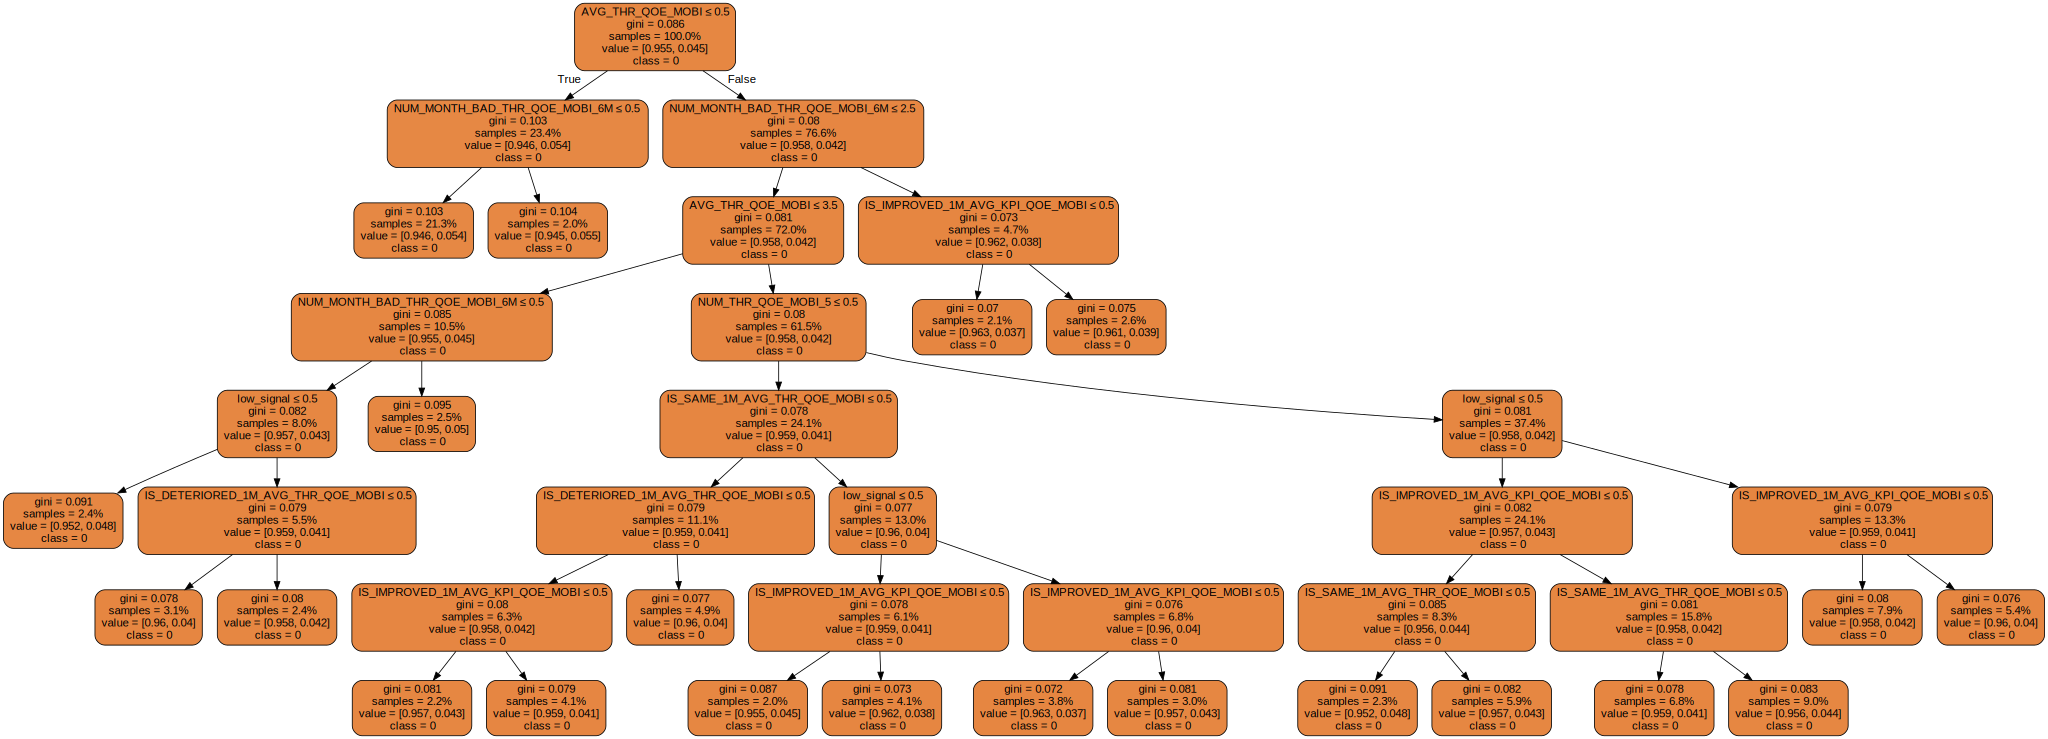

In [32]:

graph = graphviz.Source(dot_data)

# #Para exportarlo a pdf graph.render("Arbol")
graph

In [ ]:
### --- Propuesta 2

In [26]:
X=df_num[
    
          [
##  'AVG_DL_PEAK_THR_KBPS_MOBI', 
#  'AVG_KPI_PERC_CSS_MOBI',
 'AVG_THR_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
              
#  'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
#  'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI',
#  'IS_SAME_3M_AVG_THR_QOE_MOBI',
              
#  'NUM_FRIENDS',
#  'NUM_GB_2G_CURR',
#  'NUM_GB_2G_NATR_CURR',
#  'NUM_GB_3G_CURR',
#  'NUM_GB_3G_NATR_CURR',
#  'NUM_GB_3G_RAAS_CURR',
#  'NUM_LINE_KPI_QOE_MOBI',
 # NUEVO 'NUM_LINE_THR_QOE_MOBI',
 'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
#  'NUM_NETW_TMEN_CURR',
 'NUM_THR_QOE_MOBI_1',
 'NUM_THR_QOE_MOBI_5',
#  'PERC_GB_3G_ALLN_CURR',
#  'PERC_GB_2G_NATR_CURR',
# #               'PERC_GB_2G_OWNN_CURR',
#  'PERC_GB_3G_NATR_CURR',
#  'PERC_GB_3G_OWNN_CURR',
#  'PERC_GB_4G_NATR_CURR',
#  'PERC_GB_4G_OWNN_CURR',
# #  'PERC_GB_NATR_ALLN_CURR',
#  'PERC_GB_NATR_CURR',
# #  'PERC_SESS_NATR_ALLN_CURR',
#  'PERC_SESS_NATR_CURR',
 'PROBLEMAS_TECNICOS',
 'low_signal',
 'total_jiras_cc'   
    
          ]]


Y=df_num[['fuga_real']].astype(str)


# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Indice de gini para arbol de decisión
# ======================================================# Dibujamos arbol


import graphviz 
from sklearn import tree
import graphviz 
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=4000) # ANTES 3000

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)
np.unique(Y_train) # valores target deben de ser tipo caracter

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,   proportion = True,
                         special_characters=True)



Total de registros en el DF original: 191059
Porcentaje en  train respecto al original: 0.7999989532029373
Porcentaje en  test respecto al original: 0.20000104679706268


In [27]:
#df_num['AVG_THR_QOE_MOBI'].unique()
df_num['NUM_LINE_THR_QOE_MOBI'].unique()


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., 10.])

In [38]:
# conditions = [ 
              
#               (df['AVG_THR_QOE_MOBI'] <= 2.5) #(df['NUM_MONTH_BAD_THR_QOE_MOBI_6M'] > 0 )
# ]
               

# # valores
# values = [1]
               
# # aplicaciones
# df['SEG_Calidad'] = np.select(conditions, values)
# df[['SEG_Calidad']].sum()  

SEG_Calidad    53603
dtype: int64

In [39]:
df.groupby(['SEG_Calidad', 'fuga_real'])['fuga_real'].count()

SEG_Calidad  fuga_real
0            0            131707
             1              5749
1            0             50779
             1              2824
Name: fuga_real, dtype: int64

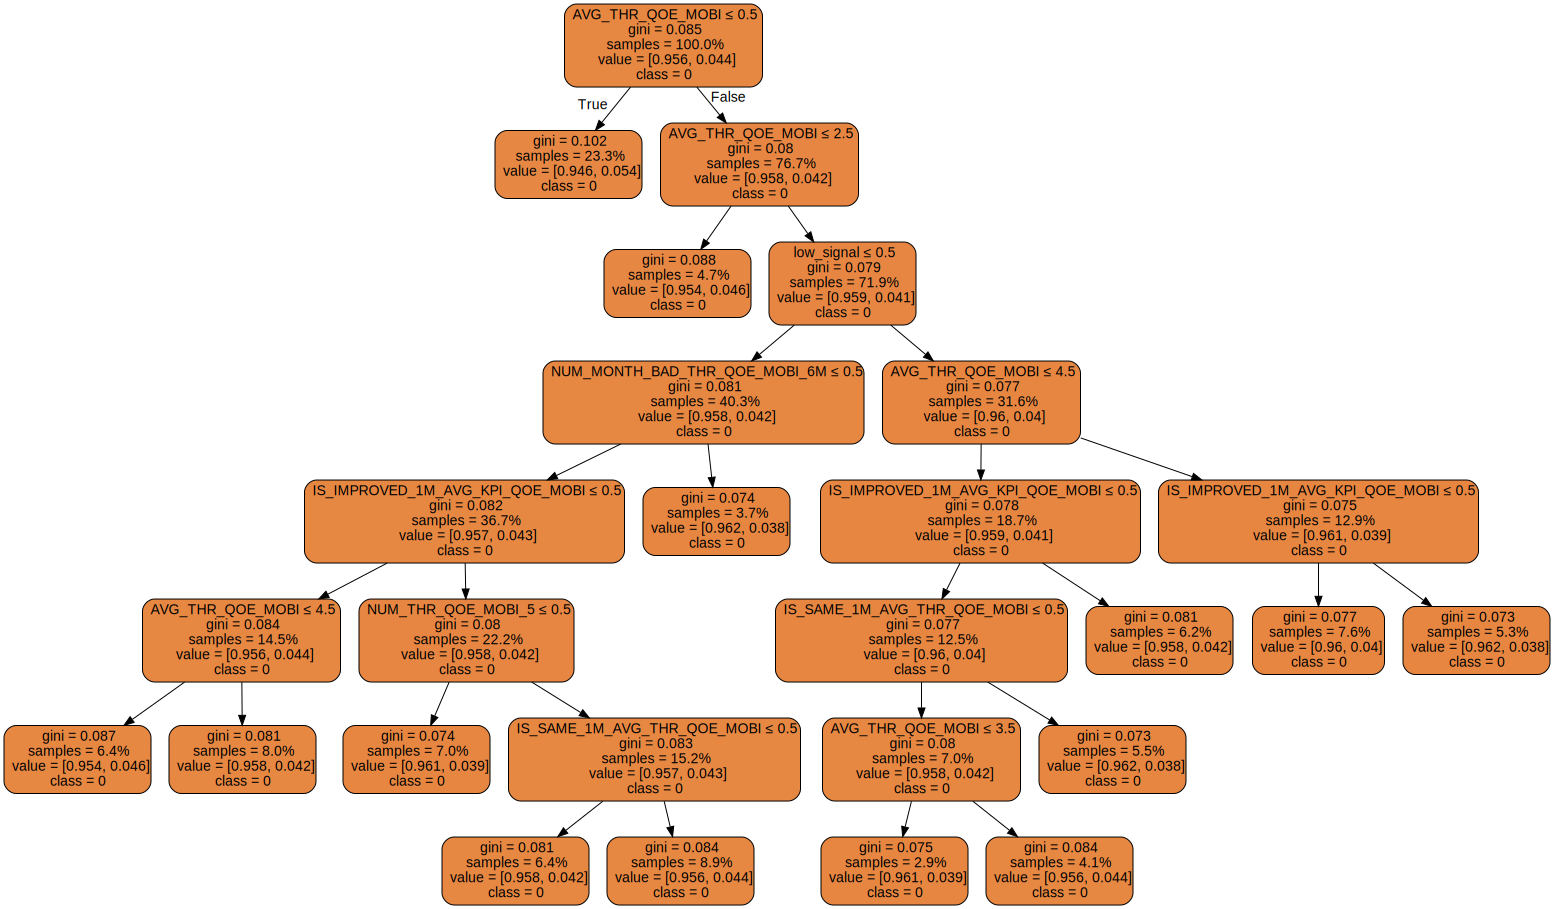

In [28]:

graph = graphviz.Source(dot_data)

# #Para exportarlo a pdf graph.render("Arbol")
graph


In [87]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  
                         special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"8,8!"')
pydot_graph.write_png('04_SEG_caliad_red.png')

True

In [ ]:
# reglas  VIEJO


# AVG_THR_QOE_MOBI >= 1.5  & low_signal = 1 &  NUM_THR_QOE_MOBI_2 ==  0  & IS_DETERIORED_1M_AVG_THR_QOE_MOBI  >=1  | 
# AVG_THR_QOE_MOBI >= 1.5  & low_signal = 1 &  NUM_THR_QOE_MOBI_2  >=1  &  NUM_MONTH_BAD_THR_QOE_MOBI_3M >= 1 

In [84]:
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal
0,2020,6,202006,YOIGO,3674764,2011-12-15,2020-02-11,56,2,2,...,0.0,0.000000,0.0,0.0,4.0,75.90,0.0,1,0,0
1,2020,6,202006,YOIGO,3908131,2012-03-07,2020-06-26,3,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
2,2020,6,202006,YOIGO,5935784,2014-02-11,.,1,1,1,...,0.0,-2.865398,0.0,1.0,0.0,0.00,0.0,1,0,0
3,2020,6,202006,YOIGO,9141449,2020-06-12,2020-06-30,1,1,1,...,4.0,0.000000,0.0,0.0,0.0,0.00,0.0,1,0,0
4,2020,6,202006,YOIGO,7141590,2015-12-24,2020-06-27,2,1,1,...,0.0,-39.999994,0.0,1.0,2.0,47.03,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63598,2020,6,202006,YOIGO,7142042,2015-12-24,2020-06-10,3,2,1,...,4.0,-2787.228070,0.0,0.0,3.0,77.95,1.0,1,0,1
63599,2020,6,202006,YOIGO,2318436,2010-09-15,2018-02-21,5,1,1,...,0.0,-958.338247,0.0,0.0,4.0,49.95,0.0,1,0,0
63600,2020,6,202006,YOIGO,6571646,2015-02-13,2019-12-10,3,1,1,...,0.0,0.000000,0.0,0.0,3.0,227.03,0.0,1,0,1
63601,2020,6,202006,YOIGO,2448912,2010-11-11,2020-06-30,2,1,1,...,0.0,-965.686906,0.0,0.0,1.0,17.95,1.0,1,0,1


In [94]:
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Propension,VERSION,fuga_real,ISSUE_CALL,GB_EXCESO,Lineas_Exceso,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,FIN_DTO
0,2020,6,202006,YOIGO,3674764,2011-12-15,2020-02-11,56,2,2,...,0.515211,2,0,0.0,0.000000,0.0,0.0,4.0,75.90,0.0
1,2020,6,202006,YOIGO,3908131,2012-03-07,2020-06-26,3,1,1,...,0.547627,2,0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0
2,2020,6,202006,YOIGO,5935784,2014-02-11,.,1,1,1,...,0.512021,2,0,0.0,-2.865398,0.0,1.0,0.0,0.00,0.0
3,2020,6,202006,YOIGO,9141449,2020-06-12,2020-06-30,1,1,1,...,0.571258,2,0,4.0,0.000000,0.0,0.0,0.0,0.00,0.0
4,2020,6,202006,YOIGO,7141590,2015-12-24,2020-06-27,2,1,1,...,0.949751,2,0,0.0,-39.999994,0.0,1.0,2.0,47.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63598,2020,6,202006,YOIGO,7142042,2015-12-24,2020-06-10,3,2,1,...,0.571136,2,0,4.0,-2787.228070,0.0,0.0,3.0,77.95,1.0
63599,2020,6,202006,YOIGO,2318436,2010-09-15,2018-02-21,5,1,1,...,0.504646,2,0,0.0,-958.338247,0.0,0.0,4.0,49.95,0.0
63600,2020,6,202006,YOIGO,6571646,2015-02-13,2019-12-10,3,1,1,...,0.546668,2,0,0.0,0.000000,0.0,0.0,3.0,227.03,0.0
63601,2020,6,202006,YOIGO,2448912,2010-11-11,2020-06-30,2,1,1,...,0.550041,2,0,0.0,-965.686906,0.0,0.0,1.0,17.95,1.0


In [93]:
#### aplicacion de reglas
verificar('ERR')

[]

In [95]:
# _____________________________________________________________________________________________________________________________________________________________________
# _____________________________________________________________________________________________________________________________________________________________________

conditions = [(df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['FIN_DTO']  == 0 ) & (df['LINEAS_TARIFA_ERRONEA'] > 1) | 
              (df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['LINEAS_TARIFA_ERRONEA'] > 1  ) & (df['flag_BONO']  == 1 )   |
              
              (df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['FIN_DTO'] == 1  ) & (df['FLAG_useless_line']  == 1 )   |
              (df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['FIN_DTO'] == 1  ) & (df['FLAG_useless_line']  == 0 )   &  (df['LINEAS_TARIFA_ERRONEA'] ==1) |
              
              (df['Lineas_Con_Consumo_Pdte'] == 0 ) & (df['LINEAS_TARIFA_ERRONEA'] > 1  ) & (df['flag_BONO']  >= 1 )  & 
              (df['MoONLY_am_wotax_data'] > 9)
                           
             ]
# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_Wrong_Tariff'] = np.select(conditions, values)
df


######
# _____________________________________________________________________________________________________________________________________________________________________
# _____________________________________________________________________________________________________________________________________________________________________

conditions = [(df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] > 2 )  | 
              (df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] < 1 ) & (df['FRIENDS_IS_CHURN_YOI'] ==1 ) | 
              (df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] < 1 ) & (df['FRIENDS_IS_CHURN_YOI'] ==0) & (df['MOSAIC_NUM_COMM_DEPT_ATC_CURR']==1)
             ]
 

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_competitors'] = np.select(conditions, values)
df
    


######
# _____________________________________________________________________________________________________________________________________________________________________
# _____________________________________________________________________________________________________________________________________________________________________
conditions = [(df['NUM_LLAMADAS_PROCESS'] >  0 ) & 
              (df['MOSAIC_NUM_COMM_DEPT_ATC_CURR'] <= 1.5 ) ]
 

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_ISSUE'] = np.select(conditions, values)
df


######
# _____________________________________________________________________________________________________________________________________________________________________
# _____________________________________________________________________________________________________________________________________________________________________

conditions = [(df['AVG_THR_QOE_MOBI'] >=  1.5 ) &  (df['low_signal'] == 1 )  & 
              (df['NUM_THR_QOE_MOBI_2'] == 0 ) &  (df['IS_DETERIORED_1M_AVG_THR_QOE_MOBI'] >= 1 )
              |
              
              (df['AVG_THR_QOE_MOBI'] >=  1.5 ) &  (df['low_signal'] == 1 )  & 
              (df['NUM_THR_QOE_MOBI_2'] >= 1 ) &   (df['NUM_MONTH_BAD_THR_QOE_MOBI_3M'] >= 1  )             
             
             ]  



KeyError: 'LINEAS_TARIFA_ERRONEA'